In [ ]:
# Desafio Final ML - Pneumologista João
# Arthur Trindade

In [1]:
# 1. Importação e Extração

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Extração: Carregar o CSV
df = pd.read_csv("/content/pneumologista_joao_pacientes.csv")

In [2]:
# 2. Transformação e Análise

print("Iniciando Transformação dos Dados")


for col in ['saturacao_oxigenio', 'peso_kg', 'altura_m']:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)


sexo_map = {
    'F': 'Feminino', 'Fem': 'Feminino', 'Feminino': 'Feminino',
    'M': 'Masculino', 'Masc': 'Masculino', 'Masculino': 'Masculino'
}
df['sexo'] = df['sexo'].replace(sexo_map).fillna('Outro')


df['imc_calculado'] = df['peso_kg'] / (df['altura_m'] ** 2)
df.drop('imc', axis=1, inplace=True)

print("Transformação concluída: Nulos tratados, 'sexo' padronizado e IMC calculado.")

Iniciando Transformação dos Dados
Transformação concluída: Nulos tratados, 'sexo' padronizado e IMC calculado.


/tmp/ipython-input-1659670332.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [3]:
# 3. CSV Tratado para análise

df.to_csv("pacientes_tratado_para_analise.csv", index=False)
print("\nArquivo 'pacientes_tratado_para_analise.csv' guardado com sucesso.")


Arquivo 'pacientes_tratado_para_analise.csv' guardado com sucesso.



Iniciando Análise
Análise do IMC (NumPy): Média = 27.14, Desvio Padrão = 6.10


/tmp/ipython-input-3869936523.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risco_cancer_pulmao', data=df, palette='viridis')


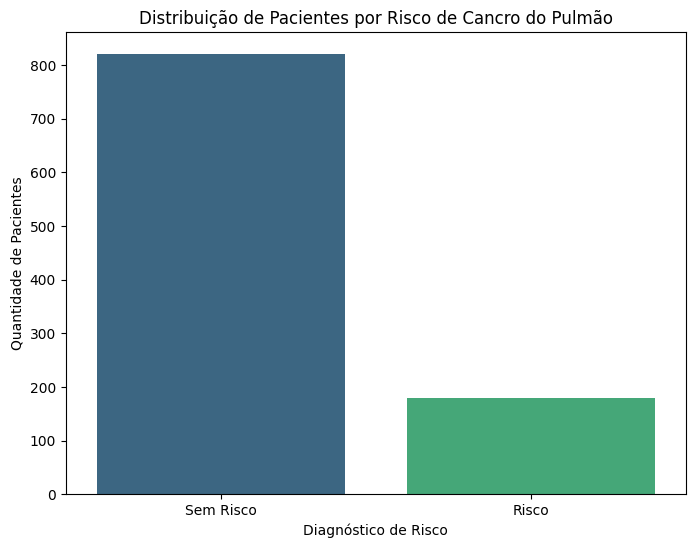

/tmp/ipython-input-3869936523.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  saturacao_por_idade = df.groupby('faixa_etaria')['saturacao_oxigenio'].mean().reset_index()


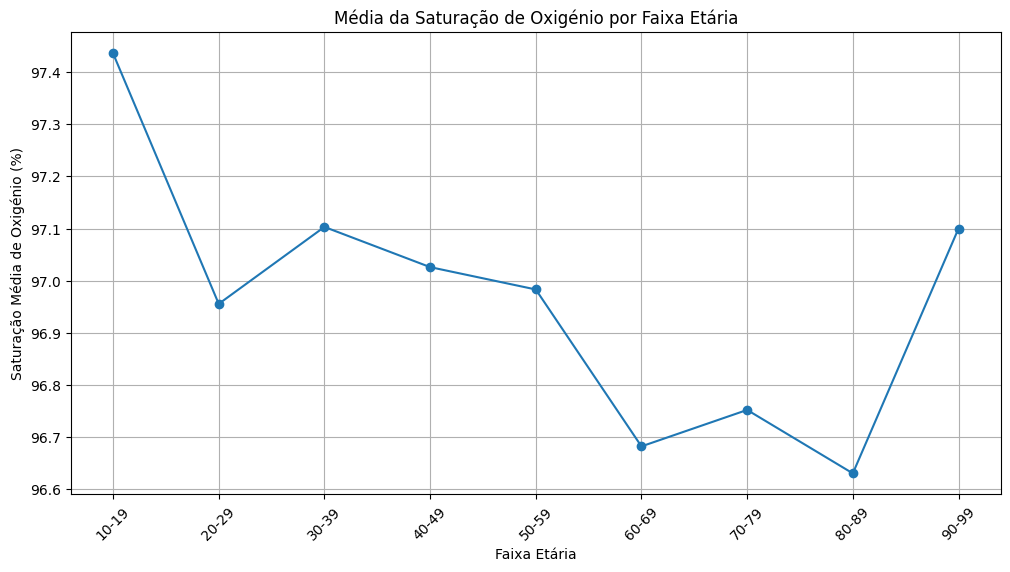

In [4]:
# 4. Visualização com Matplotlib

print("\nIniciando Análise")

# NumPy
mean_imc = np.mean(df['imc_calculado'])
std_imc = np.std(df['imc_calculado'])
print(f"Análise do IMC (NumPy): Média = {mean_imc:.2f}, Desvio Padrão = {std_imc:.2f}")

# Gráfico de Barras
plt.figure(figsize=(8, 6))
sns.countplot(x='risco_cancer_pulmao', data=df, palette='viridis')
plt.title('Distribuição de Pacientes por Risco de Cancro do Pulmão')
plt.xlabel('Diagnóstico de Risco')
plt.ylabel('Quantidade de Pacientes')
plt.show()

# Gráfico de Linha
df['faixa_etaria'] = pd.cut(df['idade'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])
saturacao_por_idade = df.groupby('faixa_etaria')['saturacao_oxigenio'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(saturacao_por_idade['faixa_etaria'], saturacao_por_idade['saturacao_oxigenio'], marker='o', linestyle='-')
plt.title('Média da Saturação de Oxigénio por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Saturação Média de Oxigénio (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [5]:
# 5. Modelos de classificação e sepação em x e y

features_to_drop = ['nome_paciente', 'risco_cancer_pulmao', 'faixa_etaria']
X = df.drop(columns=features_to_drop)
y = df['risco_cancer_pulmao']


label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)


numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [6]:
# 6. Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [8]:
# 7. Treinar e avaliar modelos

model_pipeline.fit(X_train, y_train)


predictions = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"\nAcurácia do modelo Random Forest para prever o risco: {accuracy*100:.2f}%")
print("\nProcesso de Machine Learning Concluído")


Acurácia do modelo Random Forest para prever o risco: 89.00%

Processo de Machine Learning Concluído


In [12]:
# 8. Baixar o melhor modelo

joblib.dump(model_pipeline, "model_pipeline.predict")

print("\nModelo Final Guardado")


Modelo Final Guardado
